This is a snippit of the code from Previous Coursework submission (EXample5 on Predicting Deceptive Hotel Reviews).


## Tasks **A** ##
---



```
Please note code with the provided settings will take sometime to train and run
— there's cross validation.
```



1.   Code claims classifiers were tuned by a GridSearch, there's no evidence on that — can you tune for the models you know using nested cross validation? 
2.   Add a StackingClassifier besides the VotingClassifier (last week tutorial you were provided with a`VotingClassifier` - to add (example on how from sklearn):


```
estimators = [
     ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
     ('svr', make_pipeline(StandardScaler(),
                           LinearSVC(random_state=42)))
 ]
clf = StackingClassifier(
     estimators=estimators, final_estimator=LogisticRegression()
 )
 ```
and report results. 


# 3.   Can you "beat" previous student accuracy results — if you would, report your accuracy outcomes, send me an e-mail and get a prize! 






(1596, 1)
X_train:
array(['We stayed for a one night getaway with family on a thursday. Triple AAA rate of 173 was a steal. 7th floor room complete with 44in plasma TV bose stereo, voss and evian water, and gorgeous bathroom(no tub but was fine for us) Concierge was very helpful. You cannot beat this location... Only flaw was breakfast was pricey and service was very very slow(2hours for four kids and four adults on a friday morning) even though there were only two other tables in the restaurant. Food was very good so it was worth the wait. I would return in a heartbeat. A gem in chicago... \n',
       'Triple A rate with upgrade to view room was less than $200 which also included breakfast vouchers. Had a great view of river, lake, Wrigley Bldg. & Tribune Bldg. Most major restaurants, Shopping, Sightseeing attractions within walking distance. Large room with a very comfortable bed. \n',
       "This comes a little late as I'm finally catching up on my reviews from the past several mon

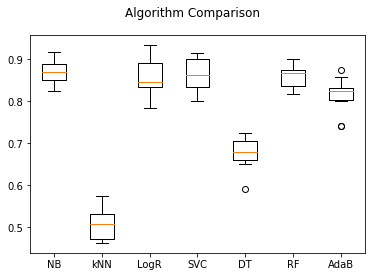

In [ ]:


# -*- coding: utf-8 -*-
"""
Created on Sat Jul 21 13:21:01 2018

@author: Former Student Ph. P
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve

#read data 
hotel_reviews = pd.read_csv('hotel_reviews_raw_data.csv')





#drop duplicate values
hotel_reviews.drop_duplicates(['text'], inplace=True)
#hotel_reviews.drop(['polarity'], 1, inplace=True)

#encode label
le = LabelEncoder()
label = le.fit_transform(hotel_reviews['deceptive'])

#define X and y
X = np.array(hotel_reviews['text'])
y = np.array(label)

# encoding polarity.
P = le.fit_transform(hotel_reviews['polarity'])
Polarity = np.array(P).reshape(1596,1)
print (Polarity.shape)

#turn text into numeric feature vectors
#vec = CountVectorizer(stop_words='english', ngram_range=(1,3))
#reviews = vec.fit_transform(X) #vocabulary created using all data


vec = CountVectorizer(stop_words='english', ngram_range=(1,2)).fit(X)
reviews = vec.transform(X)
print("X_train:\n{}".format(repr(X)))



feature_names = vec.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

Reviews_with_Polarity = np.append(reviews.todense(), Polarity, axis=1)
#print (Reviews_with_Polarity[:,9284])

X_train, X_test, y_train, y_test = train_test_split(
    Reviews_with_Polarity, y, random_state=0, shuffle=True)
#NOTE: to include Polarity replace 'reviews' with 'Reviews_with_Polarity' in the splitting above.

#train random forest classifier
clf = RandomForestClassifier(bootstrap=True, max_features='auto', n_estimators=100, max_depth=None,min_samples_split=5, random_state=7, oob_score=True)
clf.fit(X_train,y_train)

#Get feature names
names = vec.get_feature_names()

#print features and importance scores
#print (sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), names), reverse=True))

#create subset of features
sfm = SelectFromModel(clf, threshold=0.00015)

sfm.fit(X_train, y_train)


#X_best_features_train = sfm.transform(X_train)
#X_best_features_test = sfm.transform(X_test)
X_best_features_train = X_train
X_best_features_test = X_test


#prepare algorithms to test
models = []
models.append(('NB', MultinomialNB()))
models.append(('kNN', KNeighborsClassifier(n_neighbors = 10)))
models.append(('LogR', LogisticRegression()))
models.append(('SVC', SVC(C=10, gamma=0.001))) #model is tuned using GridSearch (code in seperate file)
models.append(('DT', tree.DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(bootstrap=True, max_features='auto', n_estimators=50, max_depth=None,min_samples_split=5, random_state=7)))
models.append(('AdaB', AdaBoostClassifier()))



#evaluate each algorithm
results = []
names = []
for name, model in models:
    #If not statified, shuffle is vital given data is ordered by labels.
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    cv_results = cross_val_score(model, X_best_features_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))
    
#boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Tasks **B** ##
Apply the predictors you learnt on the [The 20 newsgroups text dataset](https://scikit-learn.org/stable/datasets/real_world.html#newsgroups-dataset). How far your accuracy results can get?


```
Note: code on MultinomilaNB is provided in scikit-learn documentaion. Same link above.
```




## Tasks **C** ##
On the Iris Dataset of all target classes:


1.   What models would provide multiclass classifications.


> Apply them to do the job — cheating here: would you try multinomial logistic regression?


2.   Check the One Vs All multiclass classifiers on scikit learn documentation and apply those you have been learning over previous weeks. 



